In [1]:
import numpy as np
import pandas as pd
import json
from utils import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation, GRU, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# truth_df = pd.DataFrame(columns=['id','truthMedian','truthClass','truthMean'])
# with open('data/truth.jsonl') as data:
#     for labelobj in data:
#         truth = json.loads(labelobj)
#         truthlabel = {'id': truth['id'], 'truthMedian': truth['truthMedian'], 'truthClass': truth['truthClass'], 'truthMean': truth['truthMean']}
#         truth_df = truth_df.append(truthlabel, ignore_index = True)
# truth_df.head()  

In [3]:
# instances_df = pd.DataFrame(columns=['id','postText'])
# with open('data/instances.jsonl') as data:
# 	for instanceobj in data:
# 		instance = json.loads(instanceobj)
# 		instancerow = {'id': instance['id'], 'postText': instance['postText']}
# 		instances_df = instances_df.append(instancerow, ignore_index=True)
# instances_df.head()

In [4]:
# dataset = instances_df.join(truth_df.set_index('id'), on='id')
# dataset = dataset.drop(labels='id',axis=1)
# for i in range(len(dataset)):
#     dataset['postText'].values[i] = dataset['postText'].values[i][0]
# dataset['postText'].dropna(inplace=True)
# dataset.head()

In [5]:
# # Convert the 'no-clickbait' or 'clickbait' to binary indicator
# dataset['truthClass'] = dataset['truthClass'].apply(classToBinary)
# # Convert floating number in 'truthMedian' column to integer
# dataset['truthMedian'] = dataset['truthMedian'].apply(medianToInteger)
# # Remove all punctuations and clear the text
# dataset['postText'] = dataset['postText'].apply(cleanText)
# dataset.head()

In [6]:
# # length of titles with longest words
# maxLen = maxLengthInPostText(dataset)
# maxLen

In [7]:
# # split the dataset to training and testing set
# train, test = train_test_split(dataset, test_size=0.2)
# X_train, Y_train, Y_train_mean = np.array(train["postText"].tolist()), np.array(train["truthMedian"].tolist()), np.array(train["truthMean"].tolist())
# X_test, Y_test, Y_test_mean = np.array(test["postText"].tolist()), np.array(test["truthClass"].tolist()), np.array(test["truthMean"].tolist())
# print(Y_train.shape)
# print(Y_test.shape)

In [8]:
train_df = pd.DataFrame(columns=['id','postText','truthMedian','truthClass','truthMean'])
with open('data/train.json') as json_data:
    data = json.load(json_data)
    for instance in data:
        train_instance = {'id': instance['text_id'], 'postText': instance['post_text'], 'truthMedian': instance['truth_median'], 'truthClass': instance['click_bait'], 'truthMean': instance['truth_mean']}
        train_df = train_df.append(train_instance, ignore_index = True)
train_df.head()

,id,postText,truthMedian,truthClass,truthMean
0,849630396191055872,"Flying mattress strikes biker at 50 mph, ends ...",0.000000,0,0.200000
1,805003400136036352,The Grand Tour: Jeremy Clarkson is really taun...,0.000000,0,0.200000
2,811134324628226048,Was this murderous attack on a Russian diploma...,0.666667,1,0.533333
3,807681539580502016,"PartyNextDoor brings out Drake, G-Eazy and mor...",0.000000,0,0.266667
4,807465142032232450,A far-right Dutch lawmaker who wants to Make t...,0.000000,0,0.200000


In [9]:
test_df = pd.DataFrame(columns=['id','postText','truthMedian','truthClass','truthMean'])
with open('data/test.json') as json_data:
    data = json.load(json_data)
    for instance in data:
        test_instance = {'id': instance['text_id'], 'postText': instance['post_text'], 'truthMedian': instance['truth_median'], 'truthClass': instance['click_bait'], 'truthMean': instance['truth_mean']}
        test_df = test_df.append(test_instance, ignore_index = True)
test_df.head()

,id,postText,truthMedian,truthClass,truthMean
0,841383755944189952,"John Lewis blasts GOP rep's ""bigoted and racis...",0.000000,0,0.200000
1,852354010820620288,The NBA playoff bracket is now set,0.000000,0,0.200000
2,838728651545903104,Migrants smash up German asylum centre and sev...,0.000000,0,0.133333
3,805465449739718656,"America's most livable states, ranked",0.666667,1,0.666667
4,841713776382627840,WIP or RIP?,1.000000,1,0.933333


In [10]:
# Convert floating number in 'truthMedian' column to integer
train_df['truthMedian'] = train_df['truthMedian'].apply(medianToInteger)
# Remove all punctuations and clear the text
train_df['postText'] = train_df['postText'].apply(cleanText)
train_df.head()

,id,postText,truthMedian,truthClass,truthMean
0,849630396191055872,flying mattress strikes biker at 50 mph ends u...,0,0,0.200000
1,805003400136036352,the grand tour jeremy clarkson is really taunt...,0,0,0.200000
2,811134324628226048,was this murderous attack on a russian diploma...,2,1,0.533333
3,807681539580502016,partynextdoor brings out drake geazy and more ...,0,0,0.266667
4,807465142032232450,a farright dutch lawmaker who wants to make th...,0,0,0.200000


In [11]:
# Convert floating number in 'truthMedian' column to integer
test_df['truthMedian'] = test_df['truthMedian'].apply(medianToInteger)
# Remove all punctuations and clear the text
test_df['postText'] = test_df['postText'].apply(cleanText)
test_df.head()

,id,postText,truthMedian,truthClass,truthMean
0,841383755944189952,john lewis blasts gop reps bigoted and racist ...,0,0,0.200000
1,852354010820620288,the nba playoff bracket is now set,0,0,0.200000
2,838728651545903104,migrants smash up german asylum centre and sev...,0,0,0.133333
3,805465449739718656,americas most livable states ranked,2,1,0.666667
4,841713776382627840,wip or rip,3,1,0.933333


In [12]:
# length of titles with longest words
maxLen = max(maxLengthInPostText(train_df), maxLengthInPostText(test_df))
maxLen

25

In [13]:
X_train, Y_train = np.array(train_df["postText"].tolist()), np.array(train_df["truthMedian"].tolist())
X_test, Y_test = np.array(test_df["postText"].tolist()), np.array(test_df["truthClass"].tolist())
print(X_train.shape)
print(X_test.shape)

(15567,)
(3892,)


In [14]:
# import the glove word embedding file
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B/glove.6B.100d.txt')

In [15]:
Indices = sentences_to_indices(X_train,word_to_index, maxLen)
print("X_Train_indices =\n", Indices.shape)

X_Train_indices =
 (15567, 25)


In [16]:
def ClickBait_BiGRU(input_shape, word_to_vec_map, word_to_index):
    sentence_indices = Input(input_shape, dtype='int32')
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    # Propagate sentence_indices through your embedding layer
    embeddings = embedding_layer(sentence_indices)   
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    X = Bidirectional(GRU(128, return_sequences=True))(embeddings)
    # dropout
    X = Dropout(0.5)(X)
    X = Bidirectional(GRU(128, return_sequences=True))(X)
    # dropout
    X = Dropout(0.5)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
    X = Bidirectional(GRU(128, return_sequences=False))(X)
    # dropout
    X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with 2 units
    X = Dense(4)(X)
    # Add a softmax activation
    X = Activation('softmax')(X)  
    # Create Model instance which converts sentence_indices into X.
    model = Model(sentence_indices, X) 
    return model

In [85]:
BiGRU_model = ClickBait_BiGRU((maxLen,), word_to_vec_map, word_to_index)
BiGRU_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 25, 100)           40000100  
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 25, 256)           176640    
_________________________________________________________________
dropout_15 (Dropout)         (None, 25, 256)           0         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 25, 256)           296448    
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 256)           0         
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 256)               2964

In [86]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [87]:
opt = Adam(learning_rate=3e-4)
callback = EarlyStopping(monitor='val_loss', patience=3)

In [88]:
BiGRU_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',get_f1])

In [89]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 4)
X_train_indices.shape

(15567, 25)

In [90]:
history = BiGRU_model.fit(X_train_indices, Y_train_oh, epochs = 20, validation_split=0.2, callbacks=[callback], batch_size = 64, shuffle=True)

Epoch 1/20
195/195 [==============================] - 43s 196ms/step - loss: 1.1398 - accuracy: 0.5097 - get_f1: 0.3860 - val_loss: 0.9726 - val_accuracy: 0.5652 - val_get_f1: 0.5141
Epoch 2/20
195/195 [==============================] - 37s 192ms/step - loss: 1.0069 - accuracy: 0.5532 - get_f1: 0.4943 - val_loss: 0.9588 - val_accuracy: 0.5639 - val_get_f1: 0.5130
Epoch 3/20
195/195 [==============================] - 37s 192ms/step - loss: 0.9795 - accuracy: 0.5652 - get_f1: 0.5118 - val_loss: 0.9525 - val_accuracy: 0.5777 - val_get_f1: 0.5410
Epoch 4/20
195/195 [==============================] - 38s 193ms/step - loss: 0.9743 - accuracy: 0.5713 - get_f1: 0.5247 - val_loss: 0.9337 - val_accuracy: 0.5848 - val_get_f1: 0.5062
Epoch 5/20
195/195 [==============================] - 38s 194ms/step - loss: 0.9466 - accuracy: 0.5799 - get_f1: 0.5300 - val_loss: 0.9211 - val_accuracy: 0.5912 - val_get_f1: 0.5280
Epoch 6/20
195/195 [==============================] - 38s 194ms/step - loss: 0.9442 -

dict_keys(['loss', 'accuracy', 'get_f1', 'val_loss', 'val_accuracy', 'val_get_f1'])


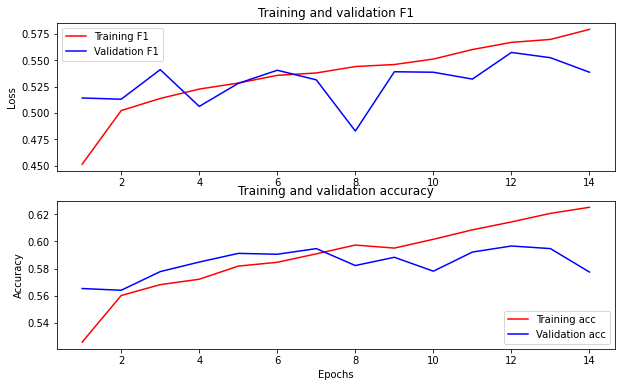

In [91]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['get_f1']
val_loss = history_dict['val_get_f1']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training F1')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation F1')
plt.title('Training and validation F1')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [92]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, mean_squared_error, classification_report
y_train_pred_oh = BiGRU_model.predict(X_train_indices)
y_train_pred_binary = onehot_to_binary(y_train_pred_oh)
Y_train_binary = onehot_to_binary(Y_train_oh)

print("GRU Training Accuracy")
print('Accuracy %s' % accuracy_score(Y_train_binary, y_train_pred_binary))
print('Precision %s' % precision_score(Y_train_binary, y_train_pred_binary))
print('Recall %s' % recall_score(Y_train_binary, y_train_pred_binary))
print('F1 score: %s' % f1_score(Y_train_binary, y_train_pred_binary))
#print('MSE %s' % mean_squared_error(Y_train_mean, y_train_pred_binary))

GRU Training Accuracy
Accuracy 0.8598316952527784
Precision 0.7003785830178475
Recall 0.7068777292576419
F1 score: 0.7036131486009237


In [93]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
y_pred_onehot = BiGRU_model.predict(X_test_indices)
y_pred_binary = onehot_to_binary(y_pred_onehot)

print("GRU Testing Accuracy")
print('Accuracy %s' % accuracy_score(Y_test, y_pred_binary))
print('Precision %s' % precision_score(Y_test, y_pred_binary))
print('Recall %s' % recall_score(Y_test, y_pred_binary))
print('F1 score: %s' % f1_score(Y_test, y_pred_binary))
#print('MSE %s' % mean_squared_error(Y_test_mean, y_pred_binary))

GRU Testing Accuracy
Accuracy 0.8216855087358684
Precision 0.6696878147029205
Recall 0.6450048496605237
F1 score: 0.6571146245059288


In [94]:
print("GRU Testing report")
print(classification_report(Y_test, y_pred_binary))

GRU Testing report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2861
           1       0.67      0.65      0.66      1031

    accuracy                           0.82      3892
   macro avg       0.77      0.77      0.77      3892
weighted avg       0.82      0.82      0.82      3892



In [70]:
# Save our model
BiGRU_model.save("BiGRU_model.h5")

In [71]:
# Write output to test_df
def predict(headline):
    headline = cleanText(headline)
    headline_np = np.array([headline])
    indices = sentences_to_indices(headline_np, word_to_index, max_len = maxLen)
    y_pred_onehot = BiGRU_model.predict(indices)
    return y_pred_onehot[0][3] + y_pred_onehot[0][2]

In [72]:
# test_df['predicted_prob_GRU'] = test_df['postText'].apply(predict)
# test_df.head()

In [45]:
# test_df.to_csv('test.csv', index = False, header=True)

In [46]:
# Error Analysis
for i in range(10):
    if Y_test[i] - y_pred_binary[i] != 0:
        print(X_test[i])
        print("Actual Label",Y_test[i])
        print("Prediction Lable",y_pred_binary[i])
        print("Prediction",y_pred_onehot[i])
        print("-------------")

americas most livable states ranked
Actual Label 1
Prediction Lable 0
Prediction [0.3028214  0.32445627 0.15137723 0.22134517]
-------------


In [47]:
headline = "Here are 10 things you may not know"
predict(headline)

0.87580955